# Import Data and Library

In [1]:
import os
os.chdir(r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\final_project\part2.2')
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\final_project\\part2.2'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import random

In [3]:
orig_df = pd.read_csv('worldbank_gender_2021.csv')
fig_folder = ''
orig_df

,Country Name,Year,Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Food production index (2014-2016 = 100),...,Merchandise imports (current US$),Merchandise trade (% of GDP),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),"Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)","Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)",Gender Ratio Class
0,Afghanistan,2021,6.51,58.74,33.60,12.00,2099.0,125.67,5.20,114.32,...,5.308000e+09,43.16,60.87,12.79,NaN,NaN,NaN,NaN,NaN,1.0
1,Albania,2021,16.54,41.47,18.36,21.89,5144.7,114.68,NaN,104.92,...,7.718000e+09,62.89,27.58,15.96,NaN,NaN,NaN,NaN,NaN,1.0
2,Algeria,2021,NaN,17.35,11.23,3.16,1433.7,108.76,20.68,104.83,...,3.746600e+10,40.86,2.10,1.61,NaN,NaN,NaN,NaN,NaN,1.0
3,American Samoa,2021,NaN,14.50,NaN,4.85,NaN,NaN,NaN,NaN,...,8.840000e+08,159.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,2021,NaN,39.91,0.53,1.59,NaN,NaN,NaN,NaN,...,1.563000e+09,51.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Virgin Islands (U.S.),2021,NaN,9.43,NaN,2.57,NaN,NaN,NaN,NaN,...,NaN,NaN,0.34,0.21,NaN,NaN,NaN,NaN,NaN,5.0
212,West Bank and Gaza,2021,NaN,64.93,6.32,6.95,2251.9,117.31,371.97,117.39,...,NaN,NaN,8.55,3.44,NaN,NaN,NaN,NaN,NaN,5.0
213,"Yemen, Rep.",2021,NaN,44.42,NaN,2.19,1524.8,124.71,10.63,120.77,...,5.054000e+09,29.68,37.64,9.04,NaN,NaN,NaN,NaN,NaN,1.0
214,Zambia,2021,NaN,32.07,3.00,5.11,2525.0,136.31,63.90,127.49,...,6.435000e+09,74.84,4.87,2.36,NaN,NaN,NaN,NaN,NaN,5.0


In [4]:
df=orig_df.copy()
temp_df=df.drop(['Country Name'], axis=1)
temp_df=df.drop(['Year'], axis=1) # all year is 2021
temp_df = temp_df.dropna(axis=1, how='all') # drop columns where all values are NaN

dummy_df=pd.get_dummies(temp_df)
dummy_df.columns

Index(['Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (% of land area)', 'Cereal yield (kg per hectare)',
       'Crop production index (2014-2016 = 100)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Food production index (2014-2016 = 100)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       ...
       'Country Name_Uruguay', 'Country Name_Uzbekistan',
       'Country Name_Vanuatu', 'Country Name_Venezuela, RB',
       'Country Name_Viet Nam', 'Country Name_Virgin Islands (U.S.)',
       'Country Name_West Bank and Gaza', 'Country Name_Yemen, Rep.',
       'Country Name_Zambia', 'Country Name_Zimbabwe'],
      dtype='object', length=365)

In [5]:
cols = set(dummy_df.columns)
cols

{'Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'CPIA structural policies cluster average (1=low to 6=high)',
 'Central government debt, total (% of GDP)',
 'Cereal yield (kg per hectare)',
 'Children out of school, primary

In [6]:
all_vars = [
    'Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'CPIA structural policies cluster average (1=low to 6=high)',
 'Central government debt, total (% of GDP)',
 'Cereal yield (kg per hectare)',
 'Children out of school, primary, female',
 'Children out of school, primary, male',
 'Completeness of birth registration (%)',
 'Container port traffic (TEU: 20 foot equivalent units)',
 'Contraceptive prevalence, any method (% of married women ages 15-49)',
 'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
 'Contributing family workers, male (% of male employment) (modeled ILO estimate)',
 'Crop production index (2014-2016 = 100)',
 'Current account balance (BoP, current US$)',
 'Death rate, crude (per 1,000 people)',
 'Diabetes prevalence (% of population ages 20 to 79)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Expense (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'External debt stocks (% of GNI)',
 'External debt stocks, total (DOD, current US$)',
 'Fertility rate, total (births per woman)',
 'Fertilizer consumption (kilograms per hectare of arable land)',
 'Firms with female participation in ownership (% of firms)',
 'Firms with female top manager (% of firms)',
 'Fixed broadband subscriptions (per 100 people)',
 'Fixed telephone subscriptions (per 100 people)',
 'Food production index (2014-2016 = 100)',
 'Forest area (% of land area)',
 'Forest area (sq. km)',
 'Fuel exports (% of merchandise exports)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GNI per capita, PPP (current international $)',
 'GNI, PPP (current international $)',
 'Gender Ratio Class',
 'Government expenditure on education, total (% of GDP)',
 'Grants, excluding technical cooperation (BoP, current US$)',
 'Gross savings (% of GDP)',
 'High-technology exports (% of manufactured exports)',
 'High-technology exports (current US$)',
 'Hospital beds (per 1,000 people)',
 'IDA resource allocation index (1=low to 6=high)',
 'Immunization, DPT (% of children ages 12-23 months)',
 'Immunization, measles (% of children ages 12-23 months)',
 'Imports of goods and services (% of GDP)',
 'Incidence of tuberculosis (per 100,000 people)',
 'Industry (including construction), value added (% of GDP)',
 'Inflation, consumer prices (annual %)',
 'Intentional homicides (per 100,000 people)',
 'Investment in energy with private participation (current US$)',
 'Investment in transport with private participation (current US$)',
 'Investment in water and sanitation with private participation (current US$)',
 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
 'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)',
 'Labor force, female (% of total labor force)',
 'Labor force, total',
 'Land area (sq. km)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
 'Literacy rate, adult female (% of females ages 15 and above)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Literacy rate, youth female (% of females ages 15-24)',
 'Literacy rate, youth male (% of males ages 15-24)',
 'Literacy rate, youth total (% of people ages 15-24)',
 'Livestock production index (2014-2016 = 100)',
 'Medium and high-tech exports (% manufactured exports)',
 'Medium and high-tech manufacturing value added (% manufacturing value added)',
 'Merchandise exports (current US$)',
 'Merchandise imports (current US$)',
 'Merchandise trade (% of GDP)',
 'Military expenditure (% of GDP)',
 'Mobile cellular subscriptions (per 100 people)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Net ODA received (% of GNI)',
 'Net ODA received per capita (current US$)',
 'Net acquisition of financial assets (% of GDP)',
 'Net incurrence of liabilities, total (% of GDP)',
 'Net lending (+) / net borrowing (-) (% of GDP)',
 'Net migration',
 'Net official development assistance received (current US$)',
 'Number of surgical procedures (per 100,000 population)',
 'Permanent cropland (% of land area)',
 'Persistence to last grade of primary, female (% of cohort)',
 'Persistence to last grade of primary, male (% of cohort)',
 'Population ages 0-14 (% of total population)',
 'Population ages 15-64 (% of total population)',
 'Population ages 65 and above (% of total population)',
 'Population growth (annual %)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Population, female (% of total population)',
 'Population, total',
 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
 'Pregnant women receiving prenatal care (%)',
 'Prevalence of HIV, total (% of population ages 15-49)',
 'Prevalence of overweight, weight for height (% of children under 5)',
 'Prevalence of severe wasting, weight for height (% of children under 5)',
 'Prevalence of stunting, height for age (% of children under 5)',
 'Prevalence of undernourishment (% of population)',
 'Prevalence of underweight, weight for age (% of children under 5)',
 'Prevalence of wasting, weight for height (% of children under 5)',
 'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
 'Primary completion rate, total (% of relevant age group)',
 'Proportion of seats held by women in national parliaments (%)',
 'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)',
 'Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)',
 'Rail lines (total route-km)',
 'Renewable energy consumption (% of total final energy consumption)',
 'Renewable internal freshwater resources, total (billion cubic meters)',
 'Revenue, excluding grants (% of GDP)',
 'Risk of catastrophic expenditure for surgical care (% of people at risk)',
 'Risk of impoverishing expenditure for surgical care (% of people at risk)',
 'Rural population',
 'Rural population (% of total population)',
 'School enrollment, preprimary (% gross)',
 'School enrollment, primary (% gross)',
 'School enrollment, primary (gross), gender parity index (GPI)',
 'School enrollment, primary and secondary (gross), gender parity index (GPI)',
 'School enrollment, secondary (% gross)',
 'School enrollment, tertiary (% gross)',
 'Secure Internet servers (per 1 million people)',
 'Short-term debt (% of total reserves)',
 'Surface area (sq. km)',
 'Technical cooperation grants (BoP, current US$)',
 'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
 'Total debt service (% of exports of goods, services and primary income)',
 'Total reserves (includes gold, current US$)',
 'Trained teachers in primary education (% of total teachers)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Unmet need for contraception (% of married women ages 15-49)',
 'Urban population',
 'Urban population (% of total population)',
 'Vulnerable employment, female (% of female employment) (modeled ILO estimate)',
 'Vulnerable employment, male (% of male employment) (modeled ILO estimate)',
 'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)'
]

input_vars = all_vars.copy()
output_var = 'Gender Ratio Class'
df[output_var] = df[output_var].apply(lambda x: int(x) if pd.notna(x) else np.nan)
df[output_var] = df[output_var].astype("category")
input_vars.remove(output_var)
input_vars

['Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'CPIA structural policies cluster average (1=low to 6=high)',
 'Central government debt, total (% of GDP)',
 'Cereal yield (kg per hectare)',
 'Children out of school, primary

# Cleaning & Outlier Removing

In [7]:
np.random.seed(42)

## Filter Missing Value (Threshold = 60%)

### Before

In [8]:
df.to_csv("before_filter.csv", index=False)

In [9]:
# Use heatmap to visualize missing value (null) positions
df=dummy_df.copy()
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#plt.show()

In [10]:
# Find missing value percent for each variable
null_percent = df[input_vars].isnull().sum()/len(df)*100
null_percent

Access to electricity (% of population)                                                                                                         0.925926
Adjusted net savings, including particulate emission damage (% of GNI)                                                                         45.370370
Age dependency ratio (% of working-age population)                                                                                              0.000000
Agricultural irrigated land (% of total agricultural land)                                                                                     81.018519
Agricultural land (% of land area)                                                                                                              3.240741
                                                                                                                                                 ...    
Urban population                                                                  

In [11]:
for x in input_vars:
    df[x] = df[x].fillna(df[x].median())

df.dropna(subset=[output_var], inplace=True)
df[output_var] = df[output_var].astype(int)

In [12]:
# After replacing missing values, re-check %missing data
df[input_vars].isnull().sum()/len(df)*100

Access to electricity (% of population)                                                                                                        0.0
Adjusted net savings, including particulate emission damage (% of GNI)                                                                         0.0
Age dependency ratio (% of working-age population)                                                                                             0.0
Agricultural irrigated land (% of total agricultural land)                                                                                     0.0
Agricultural land (% of land area)                                                                                                             0.0
                                                                                                                                              ... 
Urban population                                                                                                      

In [13]:
X = df[input_vars]
y = df[output_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# สมมุติว่ามี X, y แล้ว
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Accuracy (macro)
acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

f1_macro = make_scorer(f1_score, average='macro')
f1_scores = cross_val_score(model, X, y, cv=5, scoring=f1_macro)

# แสดงผล
print(f"✅ Logistic Regression Classification Before Remove Missing Values Columns")
print("🎯 Accuracy (macro) avg:", acc_scores.mean())
print("🎯 F1 Score (macro) avg:", f1_scores.mean())

✅ Logistic Regression Classification Before Remove Missing Values Columns
🎯 Accuracy (macro) avg: 0.31237553342816504
🎯 F1 Score (macro) avg: 0.2805315425315425


### Filter

In [14]:
df = dummy_df.copy()
# Find missing value percent for each variable
null_percent = df[input_vars].isnull().sum()/len(df)*100
null_percent

Access to electricity (% of population)                                                                                                         0.925926
Adjusted net savings, including particulate emission damage (% of GNI)                                                                         45.370370
Age dependency ratio (% of working-age population)                                                                                              0.000000
Agricultural irrigated land (% of total agricultural land)                                                                                     81.018519
Agricultural land (% of land area)                                                                                                              3.240741
                                                                                                                                                 ...    
Urban population                                                                  

In [15]:
acceptable_missing_ratio = 60
updated_vars = []
for i in range(0,len(input_vars)):  
    # if %missing value of this feature is less than or at least threshold, keep this feature
    if null_percent.iloc[i] <= acceptable_missing_ratio :          
        updated_vars.append(input_vars[i])

input_vars = updated_vars.copy()
all_vars = input_vars.copy()
all_vars.append(output_var)
df = df[all_vars].copy()
dummy_df = df.copy()

In [16]:
null_percent = df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_percent

Trained teachers in primary education (% of total teachers)    55.555556
Short-term debt (% of total reserves)                          54.629630
Intentional homicides (per 100,000 people)                     51.851852
Container port traffic (TEU: 20 foot equivalent units)         51.851852
Children out of school, primary, female                        50.925926
                                                                 ...    
Population ages 15-64 (% of total population)                   0.000000
Population ages 65 and above (% of total population)            0.000000
Population growth (annual %)                                    0.000000
Age dependency ratio (% of working-age population)              0.000000
Population, total                                               0.000000
Length: 108, dtype: float64

### After

In [17]:
df.to_csv(f"after_filter_{acceptable_missing_ratio}_percent.csv", index=False)

In [18]:
# Find missing value percent for each variable
null_percent = df.isnull().sum()/len(df)*100
null_percent

Access to electricity (% of population)                                           0.925926
Adjusted net savings, including particulate emission damage (% of GNI)           45.370370
Age dependency ratio (% of working-age population)                                0.000000
Agricultural land (% of land area)                                                3.240741
Agriculture, forestry, and fishing, value added (% of GDP)                       11.574074
                                                                                   ...    
Urban population                                                                  0.925926
Urban population (% of total population)                                          0.925926
Vulnerable employment, female (% of female employment) (modeled ILO estimate)    13.888889
Vulnerable employment, male (% of male employment) (modeled ILO estimate)        13.888889
Gender Ratio Class                                                               13.888889

In [19]:
for x in input_vars:
    df[x] = df[x].fillna(df[x].median())

df.dropna(subset=[output_var], inplace=True)
df[output_var] = df[output_var].astype(int)

In [20]:
# After replacing missing values, re-check %missing data
df.isnull().sum()/len(df)*100

Access to electricity (% of population)                                          0.0
Adjusted net savings, including particulate emission damage (% of GNI)           0.0
Age dependency ratio (% of working-age population)                               0.0
Agricultural land (% of land area)                                               0.0
Agriculture, forestry, and fishing, value added (% of GDP)                       0.0
                                                                                ... 
Urban population                                                                 0.0
Urban population (% of total population)                                         0.0
Vulnerable employment, female (% of female employment) (modeled ILO estimate)    0.0
Vulnerable employment, male (% of male employment) (modeled ILO estimate)        0.0
Gender Ratio Class                                                               0.0
Length: 108, dtype: float64

In [21]:
X = df[input_vars]
y = df[output_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# สมมุติว่ามี X, y แล้ว
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Accuracy (macro)
acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

f1_macro = make_scorer(f1_score, average='macro')
f1_scores = cross_val_score(model, X, y, cv=5, scoring=f1_macro)

# แสดงผล
print(f"✅ Logistic Regression Classification After Remove Missing Values Columns (Threshold = {acceptable_missing_ratio}%)")
print("🎯 Accuracy (macro) avg:", acc_scores.mean())
print("🎯 F1 Score (macro) avg:", f1_scores.mean())

✅ Logistic Regression Classification After Remove Missing Values Columns (Threshold = 60%)
🎯 Accuracy (macro) avg: 0.2849217638691323
🎯 F1 Score (macro) avg: 0.26847206010363905


## Remove Outlier

In [22]:
#dummy_df.isnull().sum().sort_values(ascending=False)/len(dummy_df)*100
dummy_df.isnull().sum()/len(dummy_df)*100

Access to electricity (% of population)                                           0.925926
Adjusted net savings, including particulate emission damage (% of GNI)           45.370370
Age dependency ratio (% of working-age population)                                0.000000
Agricultural land (% of land area)                                                3.240741
Agriculture, forestry, and fishing, value added (% of GDP)                       11.574074
                                                                                   ...    
Urban population                                                                  0.925926
Urban population (% of total population)                                          0.925926
Vulnerable employment, female (% of female employment) (modeled ILO estimate)    13.888889
Vulnerable employment, male (% of male employment) (modeled ILO estimate)        13.888889
Gender Ratio Class                                                               13.888889

In [23]:
X = df[input_vars]
y = df[output_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# สมมุติว่ามี X, y แล้ว
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Accuracy (macro)
acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

f1_macro = make_scorer(f1_score, average='macro')
f1_scores = cross_val_score(model, X, y, cv=5, scoring=f1_macro)

# แสดงผล
print(f"✅ Logistic Regression Classification Before Remove Outliers")
print("🎯 Accuracy (macro) avg:", acc_scores.mean())
print("🎯 F1 Score (macro) avg:", f1_scores.mean())

✅ Logistic Regression Classification Before Remove Outliers
🎯 Accuracy (macro) avg: 0.2849217638691323
🎯 F1 Score (macro) avg: 0.26847206010363905


In [24]:
df = dummy_df.copy()
for col in all_vars:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

df[output_var] = df[output_var].fillna(df[output_var].mode())
df[output_var] = df[output_var].astype(int)

# แทน outlier ด้วย median ทีละคอลัมน์
for col in input_vars:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = df[col].median()

        # แทนค่าที่เป็น outlier ด้วย median
        df.loc[(df[col] < lower) | (df[col] > upper), col] = median

In [25]:
outlier_removed_df = df.copy()

In [26]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Access to electricity (% of population)                                              0.0
Net incurrence of liabilities, total (% of GDP)                                      0.0
Population, total                                                                    0.0
Population, female (% of total population)                                           0.0
Population in urban agglomerations of more than 1 million (% of total population)    0.0
                                                                                    ... 
GDP (current US$)                                                                    0.0
Fuel exports (% of merchandise exports)                                              0.0
Forest area (sq. km)                                                                 0.0
Forest area (% of land area)                                                         0.0
Gender Ratio Class                                                                   0.0
Length: 108, dtype: f

In [27]:
X = df[input_vars]
y = df[output_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# สมมุติว่ามี X, y แล้ว
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Accuracy (macro)
acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

f1_macro = make_scorer(f1_score, average='macro')
f1_scores = cross_val_score(model, X, y, cv=5, scoring=f1_macro)

# แสดงผล
print(f"✅ Logistic Regression Classification After Remove Outliers")
print("🎯 Accuracy (macro) avg:", acc_scores.mean())
print("🎯 F1 Score (macro) avg:", f1_scores.mean())

✅ Logistic Regression Classification After Remove Outliers
🎯 Accuracy (macro) avg: 0.29143763213530655
🎯 F1 Score (macro) avg: 0.2804251328097876


In [28]:
len(input_vars)

107

In [29]:
dummy_df = df.copy()

In [30]:
df.to_csv("after_remove_outlier.csv", index=False)

# Undersampling

In [31]:
from sklearn.utils import resample

# 🔹 หาจำนวนตัวอย่างน้อยที่สุด
min_count = df[output_var].value_counts().min()

# 🔹 ดึงข้อมูลของแต่ละ class มาแบบ balance
df_undersampled = df.groupby(output_var).apply(
    lambda x: x.sample(n=min_count, random_state=42)
).reset_index(drop=True)

# ✅ ตรวจสอบผล
print("จำนวนข้อมูลต่อคลาสหลัง undersample:")
print(df_undersampled[output_var].value_counts())
df = df_undersampled.copy()


จำนวนข้อมูลต่อคลาสหลัง undersample:
Gender Ratio Class
1    20
2    20
3    20
4    20
5    20
Name: count, dtype: int64


In [32]:
df

,Access to electricity (% of population),"Adjusted net savings, including particulate emission damage (% of GNI)",Age dependency ratio (% of working-age population),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Air transport, registered carrier departures worldwide","Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),"Birth rate, crude (per 1,000 people)",Cereal yield (kg per hectare),...,"Technical cooperation grants (BoP, current US$)","Total debt service (% of exports of goods, services and primary income)","Total reserves (includes gold, current US$)",Trained teachers in primary education (% of total teachers),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population,Urban population (% of total population),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)",Gender Ratio Class
0,94.1,8.385,53.310,31.96,10.89,14225.00,1.770,9.10,21.07,1870.70,...,33130000.0,14.900,8.666862e+09,94.645,7.940,6062373.0,58.98,47.88,29.05,1
1,100.0,8.385,35.620,19.67,5.31,7647.37,15.670,13.00,14.09,2438.50,...,6200000.0,14.025,8.058082e+08,94.645,5.020,214329.0,41.10,32.28,14.65,1
2,100.0,8.385,52.370,45.46,8.79,11210.00,24.520,22.18,14.02,4557.20,...,59050000.0,14.025,3.136992e+09,94.645,5.260,4178622.0,18.86,39.95,39.84,1
3,100.0,8.385,54.135,70.34,6.56,15844.00,9.245,1.75,43.56,502.60,...,85430000.0,14.025,8.424740e+09,94.645,6.035,7974917.0,46.73,60.22,39.39,1
4,100.0,8.385,78.820,31.27,9.10,1929.00,0.020,1.61,30.69,887.40,...,27880000.0,14.025,8.285603e+08,94.645,6.035,3984863.0,68.28,88.17,61.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,11.220,62.130,7.46,2.44,42598.00,2.800,7.38,9.00,2777.30,...,62150000.0,14.025,1.674411e+10,94.645,7.610,4742889.0,85.60,8.17,13.04,5
96,100.0,8.385,74.280,64.93,6.32,15844.00,41.230,6.95,28.24,2251.90,...,62150000.0,14.025,8.725410e+08,94.645,6.035,3790664.0,77.00,20.18,21.94,5
97,100.0,8.385,55.400,34.25,7.23,1000.00,2.770,4.49,13.41,2748.80,...,68860000.0,14.025,4.270945e+09,94.645,11.790,2220419.0,59.87,45.08,49.35,5
98,100.0,8.385,45.960,43.28,0.88,15844.00,9.245,18.33,10.12,3062.55,...,62150000.0,14.025,8.424740e+09,94.645,6.610,53552.0,31.01,8.95,13.04,5


In [33]:
df.to_csv("after_undersampling.csv", index=False)

In [34]:
X = df[input_vars]
y = df[output_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# สมมุติว่ามี X, y แล้ว
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Accuracy (macro)
acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

f1_macro = make_scorer(f1_score, average='macro')
f1_scores = cross_val_score(model, X, y, cv=5, scoring=f1_macro)

# แสดงผล
print(f"✅ Logistic Regression Classification After Remove Outliers")
print("🎯 Accuracy (macro) avg:", acc_scores.mean())
print("🎯 F1 Score (macro) avg:", f1_scores.mean())

✅ Logistic Regression Classification After Remove Outliers
🎯 Accuracy (macro) avg: 0.27
🎯 F1 Score (macro) avg: 0.266034632034632


# Feature Selection

In [35]:
len(input_vars)

107

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

# 🔹 เตรียมข้อมูล
X = df.drop(columns=['Gender Ratio Class'])
y = df['Gender Ratio Class']

# 🔹 สร้าง pipeline: Standardize → RFE → LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=LogisticRegression(max_iter=1000, class_weight='balanced'), n_features_to_select=60)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# 🔹 ตั้งค่าพารามิเตอร์ที่อยาก tune
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear'],  # รองรับทั้ง L1, L2
}

# 🔹 ใช้ F1 macro เป็น scoring
grid = GridSearchCV(pipeline, param_grid, scoring=make_scorer(f1_score, average='macro'), cv=5)
grid.fit(X, y)

# 🔹 แสดงผล
print("✅ Best Params:", grid.best_params_)
print("✅ Best F1 Macro:", grid.best_score_)

# 🔹 ฟีเจอร์ที่รอดจาก RFE
rfe_step = grid.best_estimator_.named_steps['rfe']
selected_features = X.columns[rfe_step.support_]

# 🔹 ดึงชื่อฟีเจอร์ที่รอดจาก RFE
input_vars = selected_features.tolist()

# 🔹 รวมทั้งหมดไว้ใน all_vars
all_vars = input_vars.copy()
all_vars.append(output_var)

# 🔹 สร้าง DataFrame ใหม่จากฟีเจอร์ที่เลือก
df = df[all_vars].copy()

✅ Best Params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
✅ Best F1 Macro: 0.3059267399267399


In [37]:
X = df[input_vars]
y = df[output_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# สมมุติว่ามี X, y แล้ว
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Accuracy (macro)
acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

f1_macro = make_scorer(f1_score, average='macro')
f1_scores = cross_val_score(model, X, y, cv=5, scoring=f1_macro)

# แสดงผล
print(f"✅ Logistic Regression Classification After Feature Selection (From {acceptable_missing_ratio}% Filterd Data)")
print("🎯 Accuracy (macro) avg:", acc_scores.mean())
print("🎯 F1 Score (macro) avg:", f1_scores.mean())

✅ Logistic Regression Classification After Feature Selection (From 60% Filterd Data)
🎯 Accuracy (macro) avg: 0.45000000000000007
🎯 F1 Score (macro) avg: 0.4488369408369408


In [38]:
df = df[all_vars]

In [39]:
df.to_csv(f"after_rfe.csv", index=False)

# ML Model

## Hyperparameter Tuning

In [40]:
# เตรียมข้อมูล X, y
X = df[input_vars]
y = df[output_var]

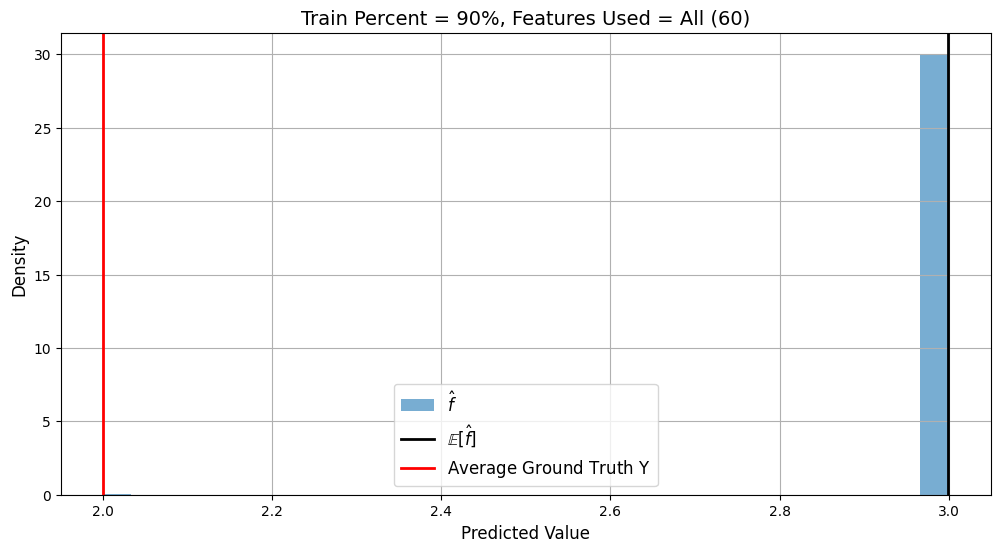

In [41]:
# 🔹 Parameters
test_percent = 0.2
train_percent = 0.9
num_iterations = 1000
num_features = len(input_vars)  # ใช้ top N features ทั้งหมด

# 🔹 Split
main_X_train, X_test_raw, main_y_train, y_test = train_test_split(
    X.iloc[:, :num_features], y, test_size=test_percent, random_state=99
)

# 🔹 Scale Test Set หนึ่งรอบด้วย Scaler จาก Train Set
scaler = StandardScaler()
scaler.fit(main_X_train)
X_test = scaler.transform(X_test_raw)

train_size = int(len(main_X_train) * train_percent)
test_f_hat = np.zeros(num_iterations)
ground_truth_y_list = []

# ✅ Fix จุด ground truth 1 จุดสำหรับทุก iteration
ground_truth_idx = np.random.randint(len(y_test))
ground_truth_y = y_test.iloc[ground_truth_idx]

# 🔁 Iteration
for i in range(num_iterations):
    rand_index = np.random.permutation(len(main_X_train))[:train_size]
    X_train_subset_raw = main_X_train.iloc[rand_index]
    y_train_subset = main_y_train.iloc[rand_index]

    # 🔹 Scale Subset
    scaler_subset = StandardScaler()
    X_train_subset = scaler_subset.fit_transform(X_train_subset_raw)

    # Train model
    model = LogisticRegression(C=1, max_iter=1000, class_weight='balanced', random_state=42)
    model.fit(X_train_subset, y_train_subset)

    # 🔹 Scale test set using the same scaler used at the top
    test_pred = model.predict(X_test)

    test_f_hat[i] = test_pred[ground_truth_idx]
    ground_truth_y_list.append(ground_truth_y)

# 🔹 Evaluation
test_E_f_hat = np.mean(test_f_hat)
test_std = np.std(test_f_hat)

# กำหนด max height ของ histogram
max_height = 1e-12
color = 'tab:blue'

# สร้าง plot
plt.figure(figsize=(12, 6))

# 🔹 Plot distribution ของ f_hat
plt.hist(test_f_hat, bins=30, density=True, color=color, alpha=0.6, label=r'$\hat{f}$')

# 🔹 Plot ค่าคาดหวัง E[f_hat]
plt.axvline(test_E_f_hat, color='k', linewidth=2.0, label=r'$\mathbb{E}[\hat{f}]$')

# 🔹 Plot ค่าจริง ground_truth_y เฉลี่ย
avg_ground_truth_y = np.mean(ground_truth_y_list)
plt.axvline(avg_ground_truth_y, color='r', linewidth=2.0, label=r'$\mathrm{Average\ Ground\ Truth\ Y}$')

# 🔹 ตกแต่ง plot
plt.title(f'Train Percent = {train_percent*100:.0f}%, Features Used = All ({X.shape[1]})', fontsize=14)
plt.legend(fontsize=12)
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Parameters
test_percent = 0.2
train_percent = 0.9
num_iterations = 1000
num_features = len(input_vars)  # ใช้ top N features ทั้งหมด
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# 🔹 Split
main_X_train, X_test_raw, main_y_train, y_test = train_test_split(
    X.iloc[:, :num_features], y, test_size=test_percent, random_state=99
)

# 🔹 Scale Test Set หนึ่งรอบด้วย Scaler จาก Train Set
scaler = StandardScaler()
scaler.fit(main_X_train)
X_test = scaler.transform(X_test_raw)

train_size = int(len(main_X_train) * train_percent)
test_f_hat = np.zeros((len(C_values), num_iterations))  # prediction ที่จุดเดียวกัน
train_squared_error = np.zeros((len(C_values), num_iterations))
ground_truth_y_list = []

# ✅ Fix จุด ground truth 1 จุดสำหรับทุก iteration
ground_truth_idx = np.random.randint(len(y_test))
ground_truth_y = y_test.iloc[ground_truth_idx]

# 🔁 Iteration
for i in range(num_iterations):
    rand_index = np.random.permutation(len(main_X_train))[:train_size]
    X_train_subset_raw = main_X_train.iloc[rand_index]
    y_train_subset = main_y_train.iloc[rand_index]

    # 🔹 Scale subset
    scaler_subset = StandardScaler()
    X_train_subset = scaler_subset.fit_transform(X_train_subset_raw)

    for c_idx, C_val in enumerate(C_values):
        model = LogisticRegression(C=C_val, max_iter=1000, class_weight='balanced', random_state=42)
        model.fit(X_train_subset, y_train_subset)

        train_pred = model.predict(X_train_subset)
        test_pred = model.predict(X_test)

        train_squared_error[c_idx, i] = np.mean((y_train_subset - train_pred) ** 2)
        test_f_hat[c_idx, i] = test_pred[ground_truth_idx]
        ground_truth_y_list.append(ground_truth_y)

# 🔹 Evaluation
E_f_hat = np.mean(test_f_hat, axis=1)
bias_squared = (E_f_hat - ground_truth_y) ** 2
var_f_hat = np.var(test_f_hat, axis=1)
test_error = bias_squared + var_f_hat
train_error = np.mean(train_squared_error, axis=1)

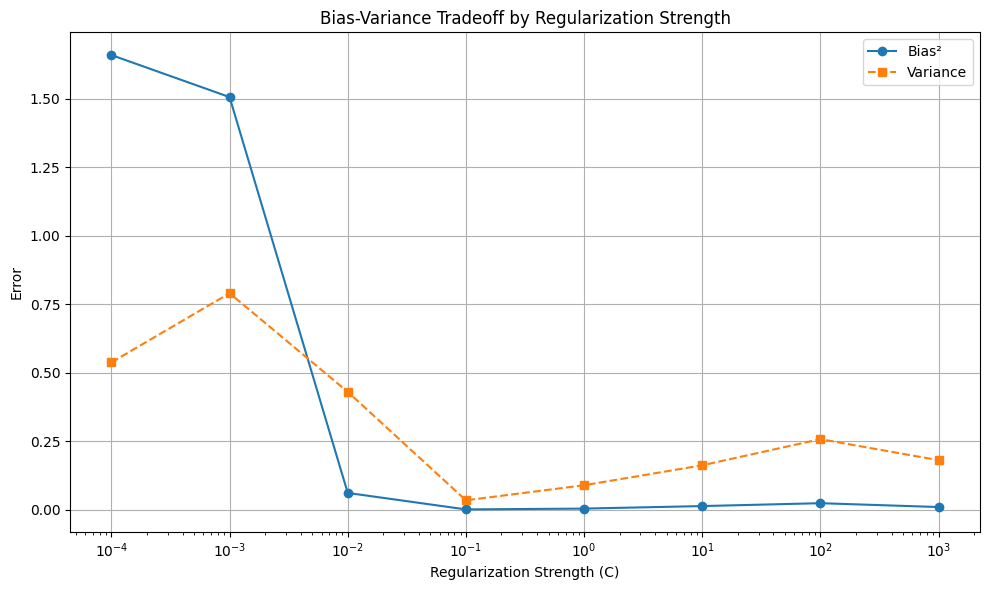

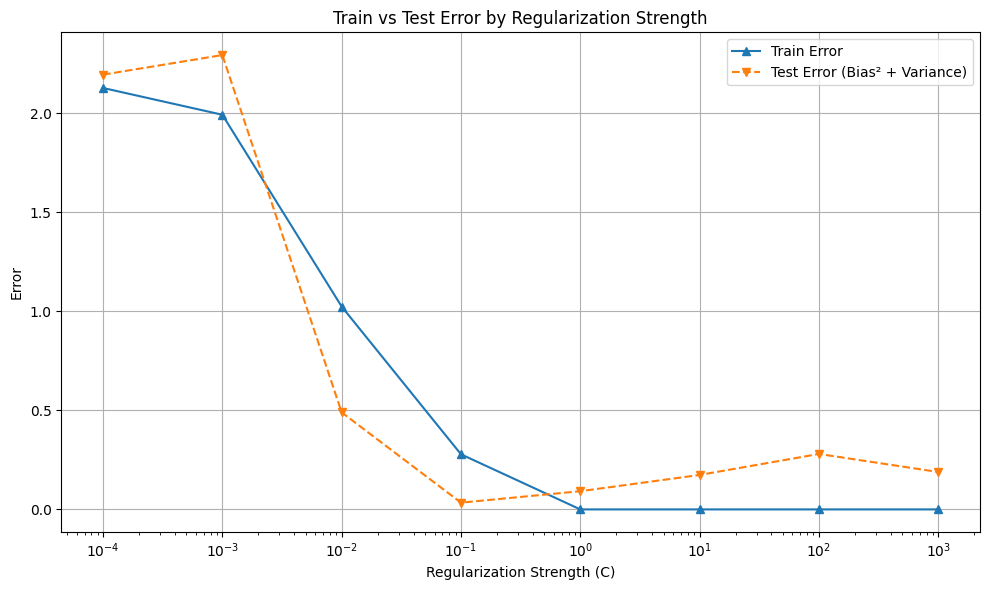

In [43]:
# 🔹 Plot 1: Bias² vs Variance
plt.figure(figsize=(10, 6))
plt.plot(C_values, bias_squared, label='Bias²', marker='o', linestyle='-')
plt.plot(C_values, var_f_hat, label='Variance', marker='s', linestyle='--')
plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff by Regularization Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔹 Plot 2: Train Error vs Test Error
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_error, label='Train Error', marker='^', linestyle='-')
plt.plot(C_values, test_error, label='Test Error (Bias² + Variance)', marker='v', linestyle='--')
plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Error")
plt.title("Train vs Test Error by Regularization Strength")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Evaluation

In [44]:
input_vars

['Access to electricity (% of population)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Arable land (% of land area)',
 'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
 'Crop production index (2014-2016 = 100)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Exports of goods and services (% of GDP)',
 'Fertilizer consumption (kilograms per hectare of arable land)',
 'Fixed broadband subscriptions (per 100 people)',
 'Fixed telephone subscriptions (per 100 people)',
 'Food production index (2014-2016 = 100)',
 'Fuel exports (% of merchandise exports)',
 'GDP (current US$)',
 'GNI per capita, PPP (current international $)',
 'Gross savings (% of GDP)',
 'High-technology exports (% of manufactured exports)',
 'High-technology exports (current US$)',
 'Immunization, measles (% of children ages 12-23 months)',
 'Imports of goods and services (% of GDP)',


Logistics Regression Classification (C = 0.1)
✅ Accuracy (macro): 0.36666666666666664
✅ F1 Score (macro): 0.3890909090909091

✅ Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.38      0.55         8
           2       0.17      0.33      0.22         6
           3       0.33      0.33      0.33         6
           4       0.40      0.40      0.40         5
           5       0.50      0.40      0.44         5

    accuracy                           0.37        30
   macro avg       0.48      0.37      0.39        30
weighted avg       0.52      0.37      0.40        30



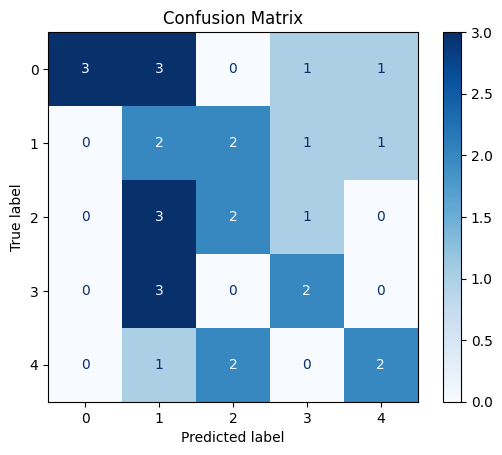

In [45]:
best_C = 0.1

from sklearn.metrics import ConfusionMatrixDisplay

# 🔹 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# 🔹 Scale ด้วย StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Train Model
model = LogisticRegression(C=best_C, class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 🔹 Predict
y_pred = model.predict(X_test_scaled)

# 🔹 Metrics
print(f"Logistics Regression Classification (C = {best_C})")
print("✅ Accuracy (macro):", accuracy_score(y_test, y_pred))
print("✅ F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Relationship Visualization

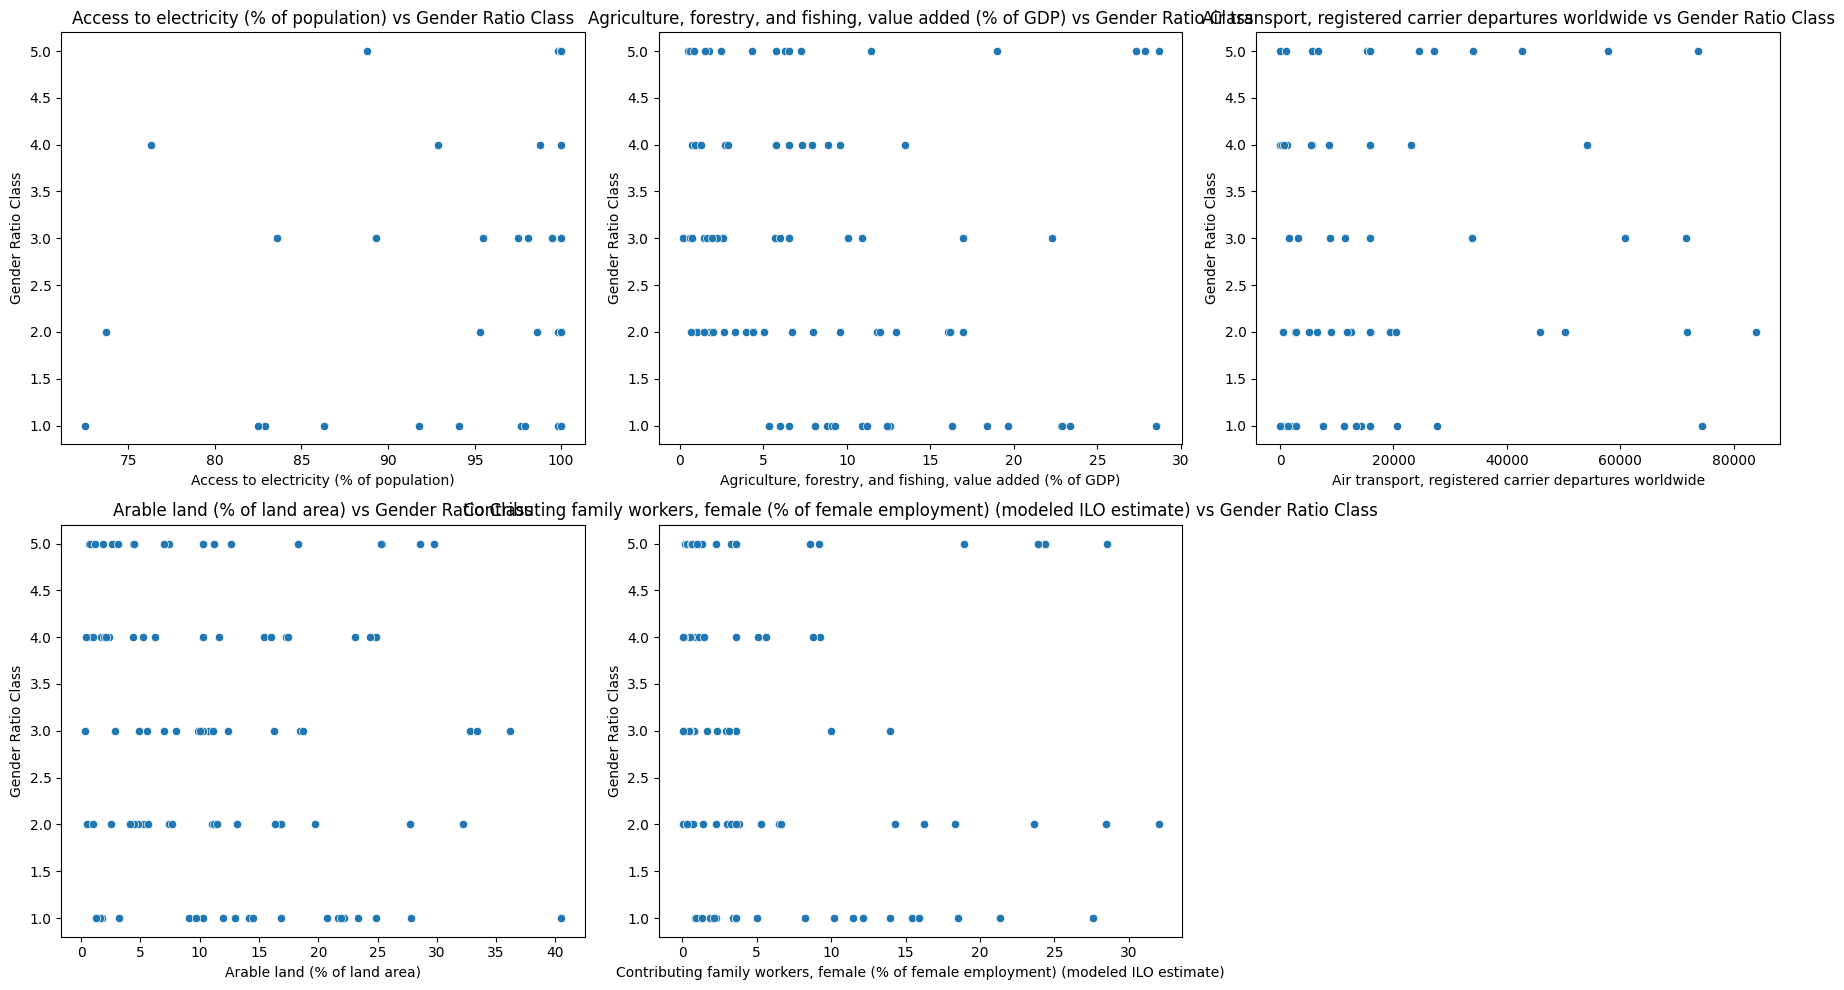

In [46]:
# 🔹 top features ที่เลือกมา
top_features = X.columns[:5]

# 🔹 วาดกราฟ
plt.figure(figsize=(18, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X[feature], y=y)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel(output_var, fontsize=10)
    plt.title(f'{feature} vs {output_var}', fontsize=12)

plt.tight_layout()
plt.show()

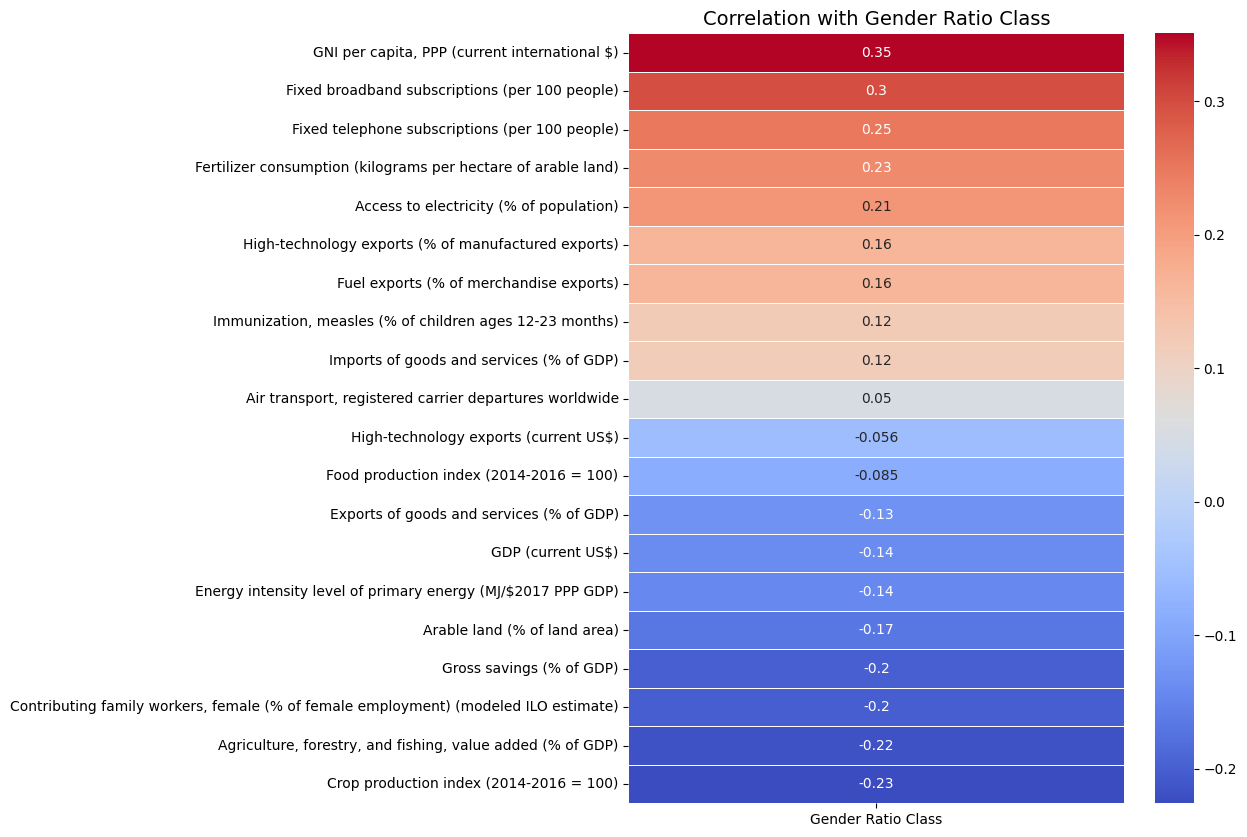

In [47]:
# 🔹 รวม features กับ target เข้าเป็น DataFrame เดียวกัน
df_corr = pd.concat([X.iloc[:, :20], y], axis=1)

# 🔹 คำนวณ Pearson correlation
corr_matrix = df_corr.corr()

# 🔹 ดูเฉพาะความสัมพันธ์ระหว่างแต่ละ feature กับ target
corr_with_target = corr_matrix[y.name].drop(y.name).sort_values(ascending=False)

# 🔹 วาด Heatmap ของ correlation เฉพาะ 20 features กับ target
plt.figure(figsize=(8, 10))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation with {output_var}', fontsize=14)
plt.show()

In [48]:
input_vars

['Access to electricity (% of population)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Arable land (% of land area)',
 'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
 'Crop production index (2014-2016 = 100)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Exports of goods and services (% of GDP)',
 'Fertilizer consumption (kilograms per hectare of arable land)',
 'Fixed broadband subscriptions (per 100 people)',
 'Fixed telephone subscriptions (per 100 people)',
 'Food production index (2014-2016 = 100)',
 'Fuel exports (% of merchandise exports)',
 'GDP (current US$)',
 'GNI per capita, PPP (current international $)',
 'Gross savings (% of GDP)',
 'High-technology exports (% of manufactured exports)',
 'High-technology exports (current US$)',
 'Immunization, measles (% of children ages 12-23 months)',
 'Imports of goods and services (% of GDP)',
